<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-118/blob/main/Equipo118__Reto_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto -> Entrega 2**


Fecha: 18/11/2022

Integrantes:

Octavio Alberto García Morán - A01213977

Diana Valeria García Briones - A01793006


---

In [108]:
#Importamos las principales librerias que utilizaremos:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import requests

In [109]:

#Importamos la informacion sobre los parametros de las aguas subterraneas:
url="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-118/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
Datos = pd.read_csv(url)
Datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [110]:
#Importamos las informacion de las escalas para categorizar las aguas subterraneas:
url = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-118/main/Reto/Escalas_subterranea.csv"
Escalas=pd.read_csv(url)
Escalas.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


#Limpieza del conjunto de datos:

Debido a que la columna SDT_mg/L no contiene ningun registro, estará sera eliminada, pero ya que no deseamos perder el Dataframe original realizamos una copia del conjunto.

In [111]:
Datos_Limpios = Datos
Datos_Limpios.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [112]:
#Eliminar la columna que no contiene datos
Datos_Limpios.drop('SDT_mg/L', axis=1, inplace=True)

Al revisar la descripcion del conjunto nos percatamos que la razon por la cual las columnas numericas estaban mal clasificadas era debido a que algunos registros tenian simbolo de < o > por lo que procederemos a eliminarlo de las variables numericas.

In [113]:
Datos_Limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   object 
 15  CALIDAD_SDT_ra       

In [114]:
#Eliminamos los simbolos de las columnas numericas
Col_Num = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L',
          'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

Datos_Limpios[Col_Num] = Datos_Limpios[Col_Num].replace({'<':''}, regex=True) #Eliminamos el simbolo de < de todas las columnas numericas

In [115]:
#Despues que eliminamos los simbolos podemos cambiar las columnas a su tipo correcto (numericas)

for name in Col_Num:
   mediana = Datos_Limpios[name].median() 
   Datos_Limpios[name]= Datos_Limpios[name].astype('float')
   Datos_Limpios[name]=Datos_Limpios[name].replace(np.nan, mediana)  #Remplazamos valores nulos por la media


In [116]:

for name in Col_Num:
   Datos_Limpios[name].replace(np.nan, np.mean)

In [117]:
#Comprobamos que los tipos de datos sean correctos
Datos_Limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

Ahora que tenemos los tipos de datos correctos podemos remplazar los valores nulos con la media.

Decidimos tratar la informacion perdida de esta forma para evitar perder una gran cantidad de registros al eliminar aquellos que contenian valores nulos.

In [118]:
#Valiamos la que ya no haya valores nulos en las variables numericas
Datos_Limpios.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  0
CALIDAD_ALC               4
CONDUCT_mS/cm             0
CALIDAD_CONDUC            6
SDT_M_mg/L                0
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  0
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                0
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L         

#1. Selecciona tus variables independientes X y dependiente Y (semáforo):

Para la variable X hemos decidido utilizar las variables numericas mientras que ya variable Y ya esta predeterminanda por el semaforo, sin embargo, debemos hacer Label Encoding para poder trabajar con esta.

Antes de realizar dicho cambio validamos el shape de los dataframes que anteriormente limpiamos y procesamos.

In [119]:
#Validaos el valor de Y
Y = pd.DataFrame(Datos['SEMAFORO']) #Es nuestro target
Y.shape

#Tomamos las variables numericas
import seaborn as sns
Datos_Num = Datos_Limpios[Col_Num]

In [120]:
Datos_Num.shape

(1068, 14)

**• Cambia a label encoding el semáforo:**

Una vez que validamos que los DF son y tienen la informacion correcta procedemos a relizar el encoding label. 

In [121]:
#Importamos la libreria que vamos a utilizar
from sklearn import preprocessing

#Aplicamos el label encoding a la variable Y
lbe = preprocessing.LabelEncoder() #Salvamos metodo
Y["ENCODING"]= lbe.fit_transform(Y["SEMAFORO"]) #Creamos un nuevo campo con el valor del encoding
Y["ENCODING"].unique() #Validamos los valores unicos creados

array([2, 1, 0])

**• Division de los datos de manera balanceada**

Definimos las variales que ingresaremos al modelo haciendo un split del conjunto para obtener los conjuntos de prueba y entrenamiento. 

Tambien es importante destacar el uso de la funcion "stratify" que nos permite tener un balace en las clases de Y, pues la cantidad de datos que se tiene por cada semaforo es diferente.

In [122]:
#Importamos la libreria
from sklearn.model_selection import train_test_split

#Asignamos valor a la semilla
Semilla = 1

#Dividioms el conjunto en set de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(Datos_Num[Datos_Num.columns], Y[['ENCODING']], test_size=0.2, random_state=Semilla, stratify= Y) 

print('X_train:',x_train.shape)
print('X_test:',x_test.shape)
print('Y_train:',y_train.shape)
print('Y_test:',y_test.shape)

X_train: (854, 14)
X_test: (214, 14)
Y_train: (854, 1)
Y_test: (214, 1)


#2. Construccion de Modelos:

**• Realiza tu clasificador: Arbol de Decision**

Una vez con la informacion preparada, podemos crear el modelo de clasificacion, para esta primera seccion utilizaremos un *Arbol de Decision:*

In [123]:
#Importamos librerias
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz

#Creamos modelo de clasificacion
Decision_Tree = tree.DecisionTreeClassifier(max_depth=7, random_state=42, class_weight='balanced') #Almacenamos el modelo en una variable

#Entrenammiento del modelo
Decision_Tree = Decision_Tree.fit(x_train, y_train)

#Almacenamos las deciciones del Arbol para poder graficarlo
Tree= export_graphviz (Decision_Tree,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)


Posteriormente realizaremos la visualizacion del arbol:

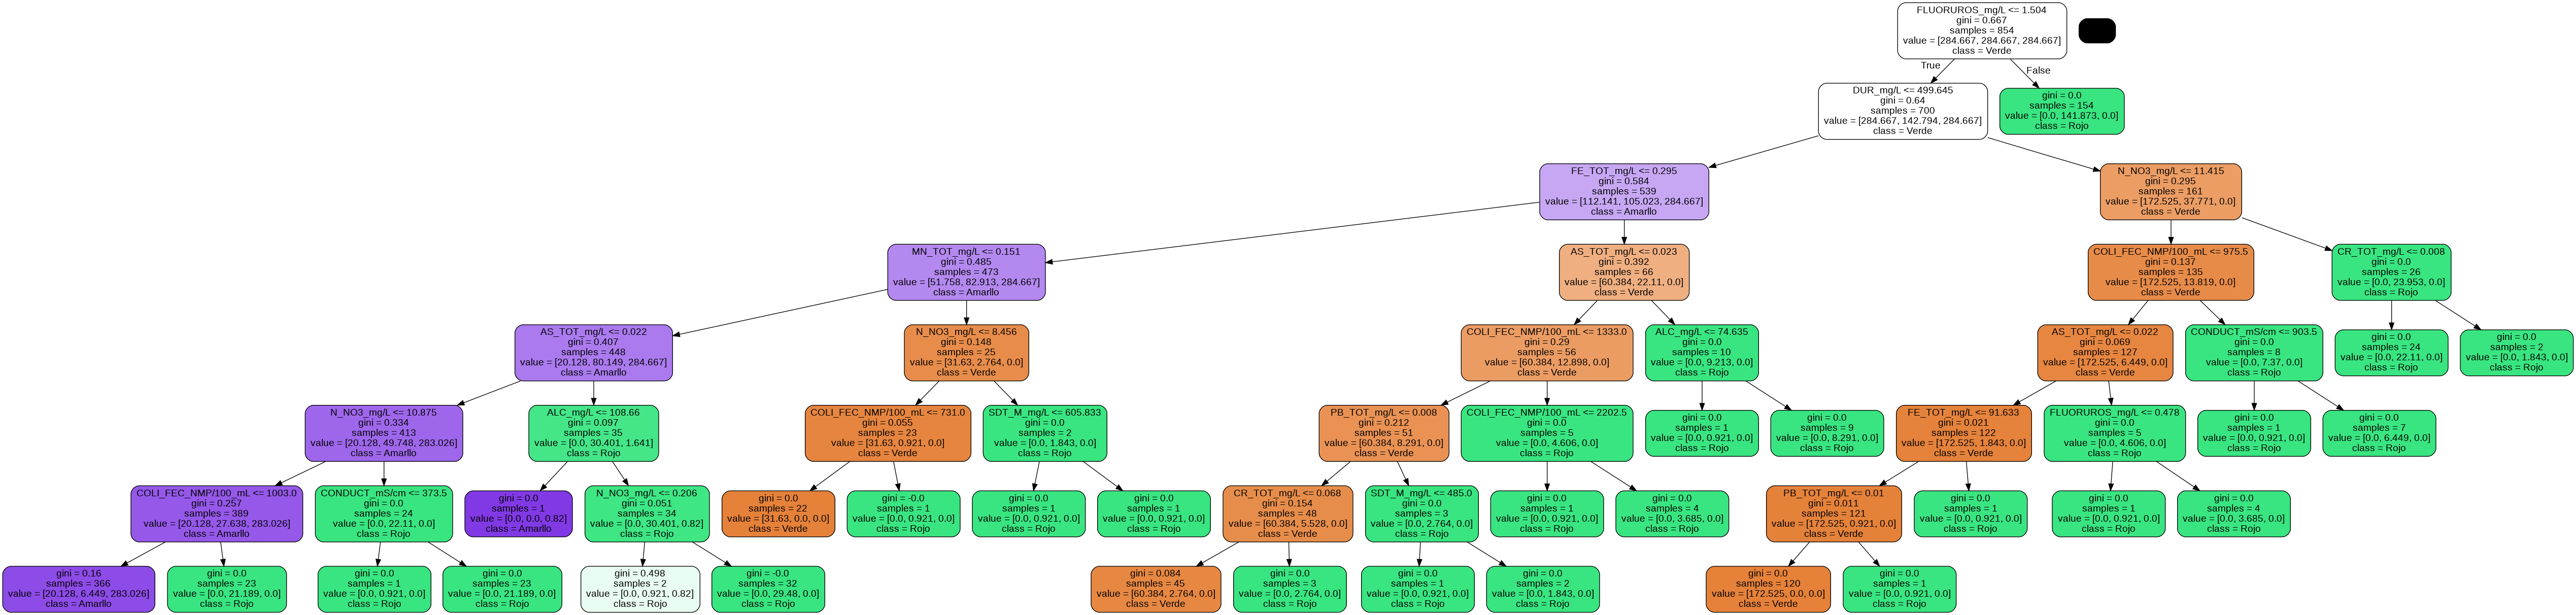

In [124]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(Tree)
graph.write_png('Arbol_colorido.png')
Image(filename = 'Arbol_colorido.png')


Creamos un arbol de profundidad 7, donde los principales grupos o divisiones mas grandes fueron determinados por las caracteristicas:



1.   DUR_mg/L
2.   N_NO3_mg/L
3. FE_TOT_mg/L



Sin embargo, tambien podemos notar como algunas ramificaciones como las de la caracteristica CR_TOT_mg/L solo tienen dos hijo y su profundidad es de 3. Aun asi en la mayoria de los hijos lograron conseguir ginis con valor a 0 o muy cercanos a este, lo que indica un buen grado de precision.

**• Selecciona las variables de mayor importancia.**

Ahora comprobaremos nuestras teorias anteriores con respecto a las caracteristicas mas importantes y el nivel de exactitud utilizando las metricas de feature y acurracy.

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
#Probamos el modelo
y_pred = Decision_Tree.predict(x_test)

In [127]:
#Presicion del modelo:
#from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.9205607476635514

La precision obtenida del arbol de decision es de 0.92% , ahora obtendremos las caracteristicas mas importantes:

In [128]:
Decision_Tree.feature_importances_

array([2.95048167e-03, 1.29006305e-16, 4.95718671e-17, 2.20777800e-01,
       1.95855833e-01, 1.11515076e-01, 1.42216656e-01, 1.08463605e-01,
       0.00000000e+00, 9.42543497e-03, 0.00000000e+00, 1.22341285e-02,
       8.08447899e-02, 1.15716195e-01])

Ya que el orden de las colummnas no cambia, podemos saber cuales fueron las caracteristicas mas importante usando la funcion de columns:

In [129]:
Datos_Num.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

Para poder visualizar mas facilmente la importancia de las caracteristicas decidimos crear una visualizacion.

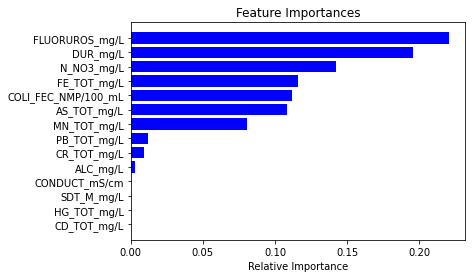

In [130]:
#Visualizacion de Feature Importance
importances = Decision_Tree.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Podemos observar que las 3 caracterisiticas mas importantes son:

1. FLUORUROS_mg/L
2. DUR_mg/L
3. N_NO3_mg/L

Mientras que las menos importantes son:

1. HG_TOT_mg/L
2. SDT_M_mg/L
3. CD_TOT_mg/L

**• Realiza tu clasificador: Bosque Aleatorio**

Ahora medireos la metrica y efiencia utilizando un *Bosque Aleatorio:*

In [131]:
#Modelo de Bosques Aleatorios

#Importamos librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Entrenamos el modelo
Random_Forest = RandomForestClassifier(max_depth=7, random_state=42, class_weight='balanced') #Utilizamos la misma pronfundidad que el Decision Tree
Random_Forest = Random_Forest.fit(x_train, y_train)
Modelo_Forest = Random_Forest[10]
Forest= export_graphviz (Modelo_Forest,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


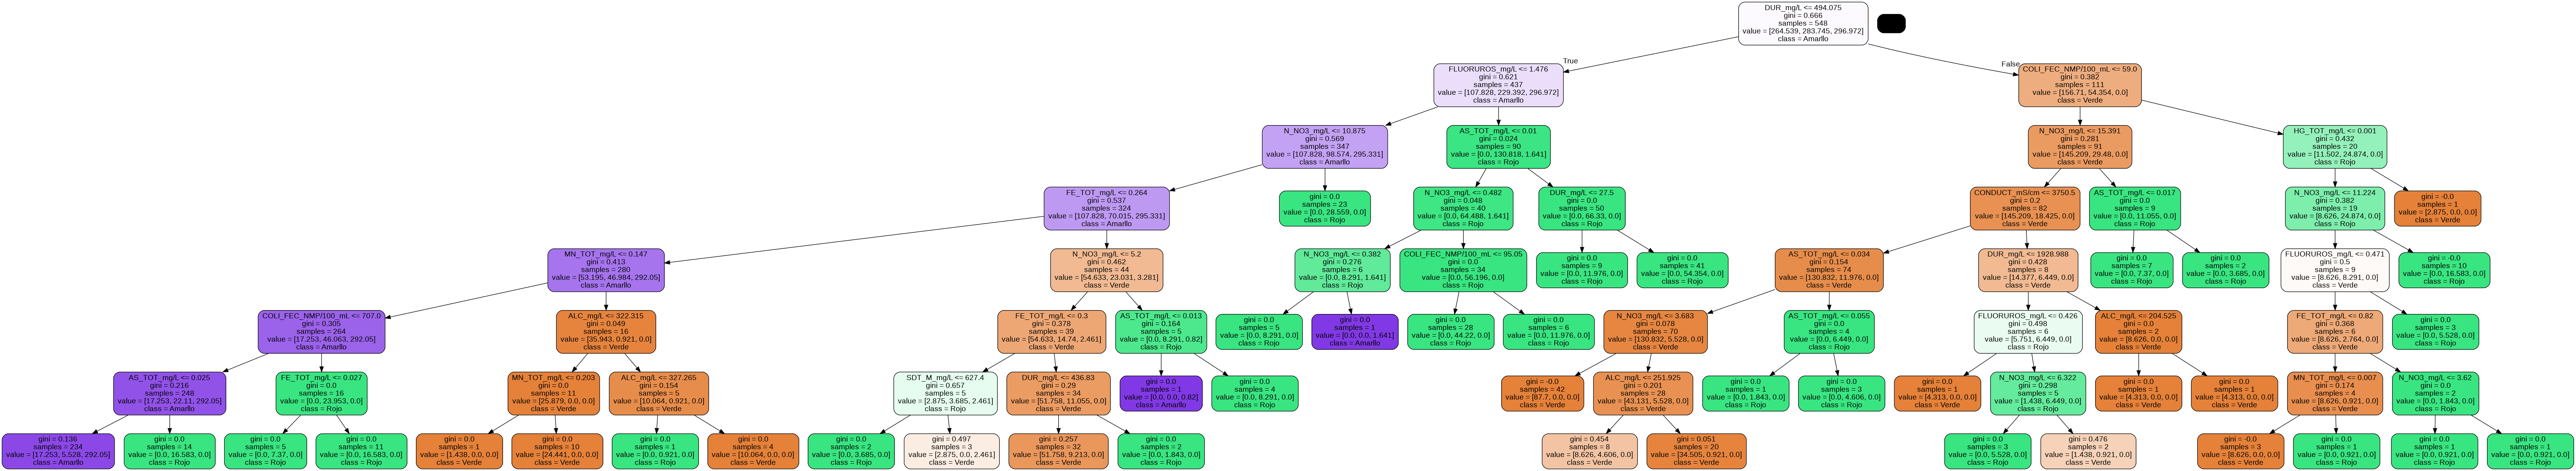

In [132]:
#visualizacion del Modelo
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(Forest)
graph.write_png('Arbol_colorido.png')
Image(filename = 'Arbol_colorido.png')

Creamos un arbol de profundidad 7, donde los 2 principales grupos o divisiones mas grandes fueron determinados por las caracteristicas:



1.   FLUORUROS_mg/L/L
2.   COLI_FEC_NMP/100_mL

Y los principales subgrupos estan determinados pricipalmente por las caracteristicas:

1. COLI_FEC_NMP/100_mL
2. ALC_mg/L
3. N_NO3_mg/L
4. HG_TOT_mg/L



Al igual que el Arbol de Decisiones la mayoria de los hijos lograron conseguir ginis con valor a 0 o muy cercanos a este, lo que indica un buen grado de precision.

**• Selecciona las variables de mayor importancia.**

Buscaremos nuevamente las caracteristicas mas importantes y el nivel de exactitud utilizando las metricas de feature y acurracy pero para el Bosque Aleatorio.

In [133]:
#Precision del modelo
y_pred_r = Random_Forest.predict(x_test)
accuracy_score(y_test, y_pred_r, normalize=True, sample_weight=None)

0.9392523364485982

Podemos observar que utilizando las mismas variables, profundidad y ajuste obtuvimos un porcentaje de casi el 2% mayor a los arboles de decision.

A continuacion validaremos las variables mas imporantes para dicho modelo:

In [134]:
#Feature Importance
Random_Forest.feature_importances_

array([3.19062064e-02, 6.82180807e-02, 7.28401829e-02, 2.06093111e-01,
       1.39570266e-01, 6.43991270e-02, 9.94912971e-02, 1.27769630e-01,
       1.98023068e-04, 8.51196960e-03, 4.34528759e-03, 4.97738921e-03,
       8.49616767e-02, 8.67177524e-02])

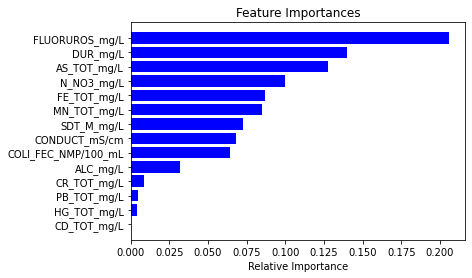

In [135]:
#Visualizacion de Feature Importance
importances = Random_Forest.feature_importances_
indices = np.argsort(importances)
features= x_test.columns

#Visualizacion del Modelo
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Podemos observar que las 3 caracterisiticas mas importantes son:

1. FLUORUROS_mg/L.
2. DUR_mg/L.
3. AS_TOT_mg/L (Variable diferente al arbol de decision).

Mientras que las menos importantes son:

1. HG_TOT_mg/L.
2. CD_TOT_mg/L.
3. PB_TOT_mg/L (Variable diferente al arbol de decision).


La diferencia mas significativa contra el arbol de decision es la caracteristica SDT_M_mg/L donde en dicho modelo tiene una aportacion practicamente nula, siendo de las menos importantes, sin embargo, en el bosque aleatorio la misma caracteristica tiene esta dentro del 50% de las caracteristicas mas importantes ocupando la posicion 7 del total.

#3. Analisis de Resulados:

Para ambos modelos utilzamos una pronfundidad de 7 he hicimos uso del balanceo de clases minoritarias, obteniendo unicamente un 0.01% de diferecia que equivale al 1.8% de precision.

In [136]:
#Reimpresion de precision de los modelos
print('Precision de Arbol: ',(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print('Precision de Bosque: ',(accuracy_score(y_test, y_pred_r, normalize=True, sample_weight=None)))

Precision de Arbol:  0.9205607476635514
Precision de Bosque:  0.9392523364485982


Si bien, la diferecia de la precision de los modelos es minima, hemos decidido analizar las metricas de votacion obtener mas informacion sobre las decisiones que tomaron los modelos y sus evaluacionens:

In [137]:
#Votacion de clases

#Importamos Modulos
from sklearn.metrics import classification_report, make_scorer
from sklearn.ensemble import VotingClassifier

#Votos Soft
soft = VotingClassifier(estimators=[ ('DecisionTree :' , Decision_Tree),('RandomForest :',Random_Forest)], voting='soft')
soft.fit(x_train, np.ravel(y_train))
predictions_soft = soft.predict(x_test)
print("Votos Soft")
print(classification_report(y_test, predictions_soft))
print("\n")

#Votos Hard
hard = VotingClassifier(estimators=[  ('DecisionTree :' , Decision_Tree),('RandomForest :',Random_Forest)], voting='hard')
hard.fit(x_train, np.ravel(y_train))
predictions_hard = hard.predict(x_test)
print("Votos Hard")
print(classification_report(y_test, predictions_hard))


Votos Soft
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        49
           1       1.00      0.90      0.95        78
           2       0.91      0.99      0.95        87

    accuracy                           0.92       214
   macro avg       0.91      0.91      0.91       214
weighted avg       0.92      0.92      0.92       214



Votos Hard
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        49
           1       1.00      0.87      0.93        78
           2       0.98      0.98      0.98        87

    accuracy                           0.94       214
   macro avg       0.93      0.94      0.93       214
weighted avg       0.95      0.94      0.94       214



Como podeoms observar, la mayoria de  los resultados en las metricas son similas o los rangos de diferecia son minimos, con excepcion de la precision y el f1-score para la clase 0, que es considerablemente menor a las demas clases.

Esto puede contribuirse a que el soporte que tienne dicha clase es de casi la mitad a difedencia de la clase 2, que es el que tiene mejores resultados, por lo que podriamos deducir como este valor afecta el rendimiento de los modelos.

Para comprobar dicha informacion hemos decidido proyectar los resultados de las prediccionnes a traves de una matriz de confusion:

In [141]:
#Declaramos la matriz de confusion 
#Importamos las librerias
from sklearn.metrics import confusion_matrix

#Construimos la Matriz
def CM_modelo(modelo,X,y,X_test,y_test): #Utilizamos las variables previamente utilizadas

    modelo.fit(X, y)
    yhat = modelo.predict(x_test)
    cm = confusion_matrix(y_test, yhat)
    txt = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()] #Calculo de la frecuencia
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]  #Calculo representativo en porcentaje

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    ax.set(ylabel="Valores Reales", xlabel="Resultado de Predicción")
    plt.show()

**Matriz de Confusion para el Arbol de Decision**

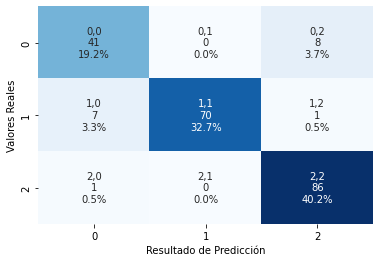

In [139]:
CM_modelo(Decision_Tree,x_train,np.ravel(y_train),x_test,np.ravel(y_test))

**Matriz de Confusion para el Bosque Aleatorio**

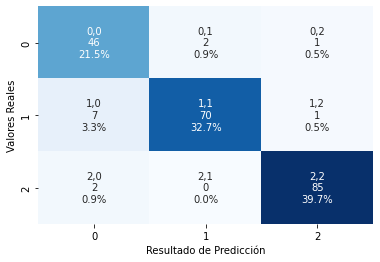

In [140]:
CM_modelo(Random_Forest,x_train,np.ravel(y_train),x_test,np.ravel(y_test))

#Conclusiones:

A pesar que la diferencia de precision parece insignificante pues la precision del arbol se representa por un valor de 0.9205 y la precision del bosque por 0.9392 resultando una diferencia del 0.0187 un poco menor al 2% podemos destacar como esta pequeña diferencia parece estar afectando mayormente a la clase 0.

La clase 0 representa la clase minoritaria como vimos en la exploracion era la que tenia menor cantidad de ejemplos, a pesar de que en ambos modelos aplicamos el balanceo de clases para amortiguar la diferencia y se utilizaron los mismos parametros, parececiera que solo los bosques aleatorios realmente mitigaron la problematica del balanceo.

En ambos modelos las clasificaciones de las clases 1 y 2, obtuvimos exactamente los mismos resultados, asi como los resultados de aciertos/fallos fueron en las clases, mientras que para la clase 0 se obtuvieron:

1. Arbol de Decision: 41 aciertos y 8 fallos.
2. Bosque Aletorio: 46 aciertos y 3 fallos.

A pesar de que los numeros parecen ser "pequeños" la diferencia es significativa al considerar porcentajes el bosque solo fallo un 6% en clasificar la clase 0, mientras que el arbol fallo en un 16%.

Considerando estas condiciones, recomendariamos utilizar el bosque aleatorio, pues es el que menos perjudico a las minorias y por lo tanto es el modelo que pudiese tener un menor sesgo.